# MOD 500: Modeling for Decision Insights

## Final Project

## "Automated Home Financing" 

# Decision Analysts:

## Muhammad Usama - 261882 - m.usama@stud.uis.no

## Asim Sabir - 261876 - as.sabir@stud.uis.no

## Introduction

The purpose of making this jupyter notebook is to find out marginal and conditional probabilities associated with the decision analysis process. This jupyter notebook not only find out these probabilities but also aids the decision analysts in making inference arcs in between chance nodes, by using correlation coefficients from correlation matix. 

## Importing Packages

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from statsmodels.distributions.empirical_distribution import ECDF
import scipy
import scipy.stats as st
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import poisson
import plotly.express as px
import plotly.graph_objects as go
import warnings
from scipy.stats import binom

## Project Description

This Decision Tree in figure below can be thought of as a representation of a single customer/CSR interaction. While the "Company makes offer?" decision is a downstream decision because it's preceded by several uncertainties, those uncertainties represent characteristics of customer accounts that can be readily observed rather than events that will play out in the future. 

The goal of the decision analysis is to reveal a decision policy (that is, a set of decision rules) that can be applied to all customers contacted. Basically, there are certain market costs that are involved in making the effort of making contact with customers. If this cost is 20 dollars, it would mean that it will cost the company 20 dollars to attempt to sell a loan policy to a given customer. 

In some scenarios the company’s customer service representatives, attempt to sell the Loan Package. Once the offer is extended, and if customer is interested then customers are provided with a loan package based on the values of Loan Term and Loan Amounts provided by the customer, the values and  probabilities for the variables 'Loan Term' and 'Loan Amount' are observed from previous data for setting up a decision policy which helps the CSR decide what kind of offer, should be given to these customers based on the NPV amount of interest they will be paying to the Company in form of installments in future.

#### INFERENCE DIAGRAM

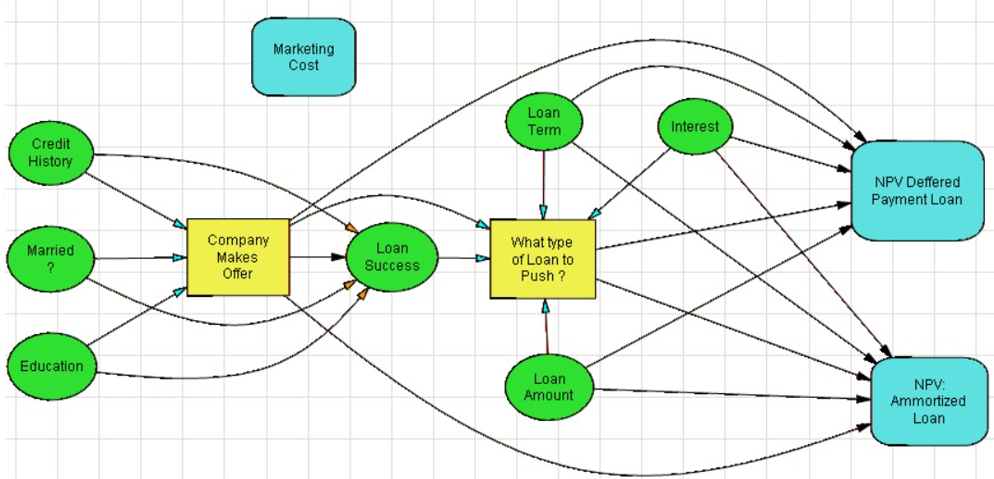

#### DECISION TREE

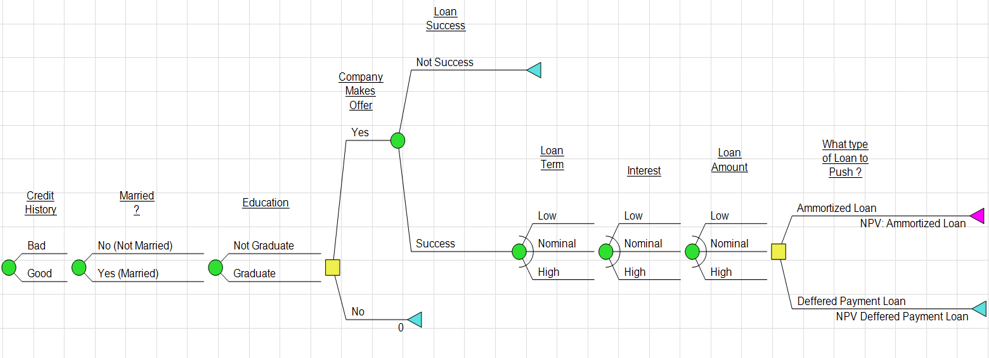

## Importing Dataset 

The dataset is imported and visualized using pandas.

In [18]:
Base_data = pd.read_csv('LOAN_.csv')

In [19]:
Base_data=Base_data.dropna(subset=['LoanAmount'])

In [20]:
Base_data=Base_data.dropna(subset=['Loan_Amount_Term'])

In [21]:
Base_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Correlations for All Uncertainities

Corelation between all the uncertainities will be considered here, the loan status shows determines the loan success, meaning the customer is hooked or not. 

It can be considered that LOAN STATUS is OUTPUT and all others are INPUTS. 

In [22]:
Test_Data = Base_data.copy()
Test_Data.drop(['Loan_ID'], axis=1, inplace=True)
Test_Data = Test_Data.dropna()

In [23]:
Test_Data = Test_Data.replace({'Loan_Status': {'Y': 1, 'N': 0}})
Test_Data = Test_Data.replace({'Married': {'Yes': 1, 'No': 0}})
Test_Data = Test_Data.replace({'Education': {'Graduate': 1, 'Not Graduate': 0}})
Test_Data = Test_Data.replace({'Self_Employed': {'Yes': 1, 'No': 0}})
Test_Data = Test_Data.replace({'Dependents': {'0': 0, '1': 1, '2': 1, '3': 1, '3+': 1}})
Test_Data = Test_Data.replace({'Gender': {'Male': 1, 'Female': 0}})
Test_Data = Test_Data.replace({'Property_Area': {'Urban': 1,'Semiurban': 0,'Rural': -1}})

<AxesSubplot:>

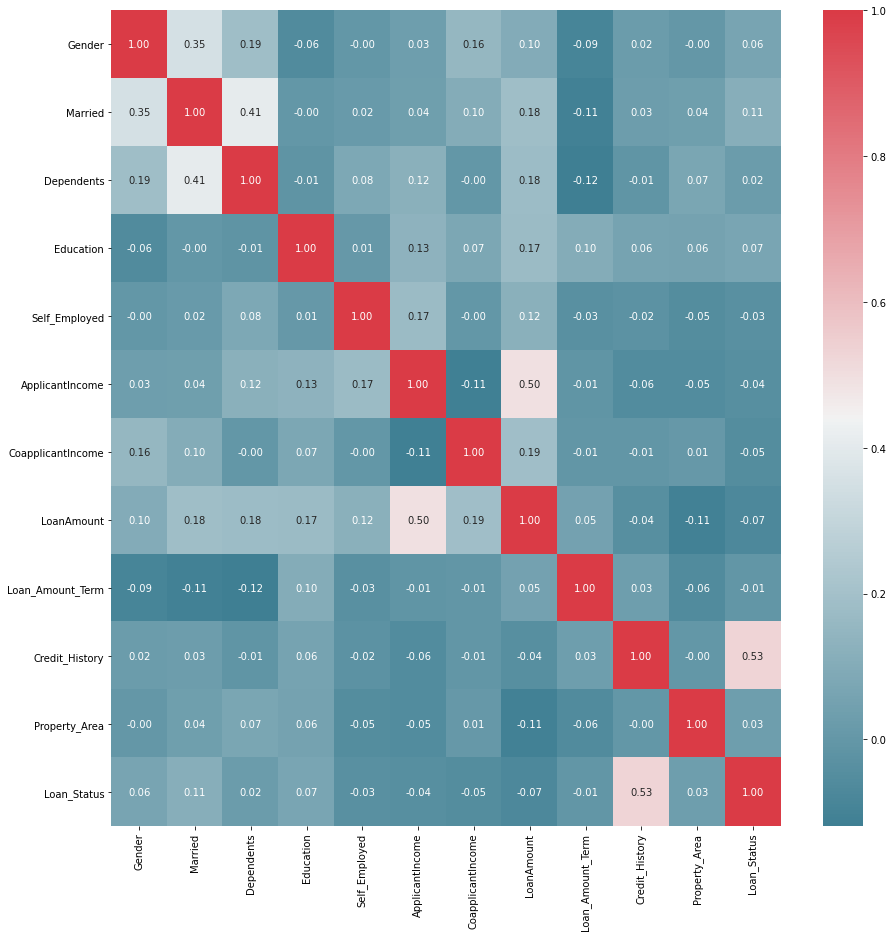

In [24]:
# Lets see the correlations
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)
corr = Test_Data.corr()
#Generate Color Map, red & blue
colormap = sbn.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sbn.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", ax=ax)

It is clear from above analysis that only credit history **really** influences the Loan_Status,(Correlation of 0.53 is considered mild, and below 0.2 is usually considered very weak), meaning if the customer has a good cedit history, then there are good chances he will be interested in the loan package and CSR interaction will result in a success, inorder to make a more diverse decision policy, the analysts choose to take the marital status andeducation of the customers into acount as well.  

In order to offer a loan package the CSR also needs information about the Loan Amount and Loan Term, but before they get these values from customer they must have a decision policy in place, according to which they can decide what they should do in their further interactions. 

To setup this policy, the values and probabities of Loan_Amount and Loan Terms are inferred from the dataset which is already available. 

## Correlations for Uncertainities Considered

In [25]:
Test_Data = Base_data.copy()
Test_Data.drop(['Loan_ID'], axis=1, inplace=True)
Test_Data = Test_Data.dropna()
Test_Data

del Test_Data['Gender']
del Test_Data['Dependents']
del Test_Data['Self_Employed']
del Test_Data['ApplicantIncome']
del Test_Data['CoapplicantIncome']
del Test_Data['Property_Area']
#del Test_Data['Loan_Status']

Conversion list for correlation calculation 

**MARRIED STATUS**

1. Yes = 1
2. No = 0

**EDUCATON STATUS**

1. Graduate = 1
2. Not-Graduate = 0

In [26]:
Test_Data = Test_Data.replace({'Married': {'Yes': 1, 'No': 0}})
Test_Data = Test_Data.replace({'Education': {'Graduate': 1, 'Not Graduate': 0}})
Test_Data = Test_Data.replace({'Loan_Status': {'Y': 1, 'N': 0}})

<AxesSubplot:>

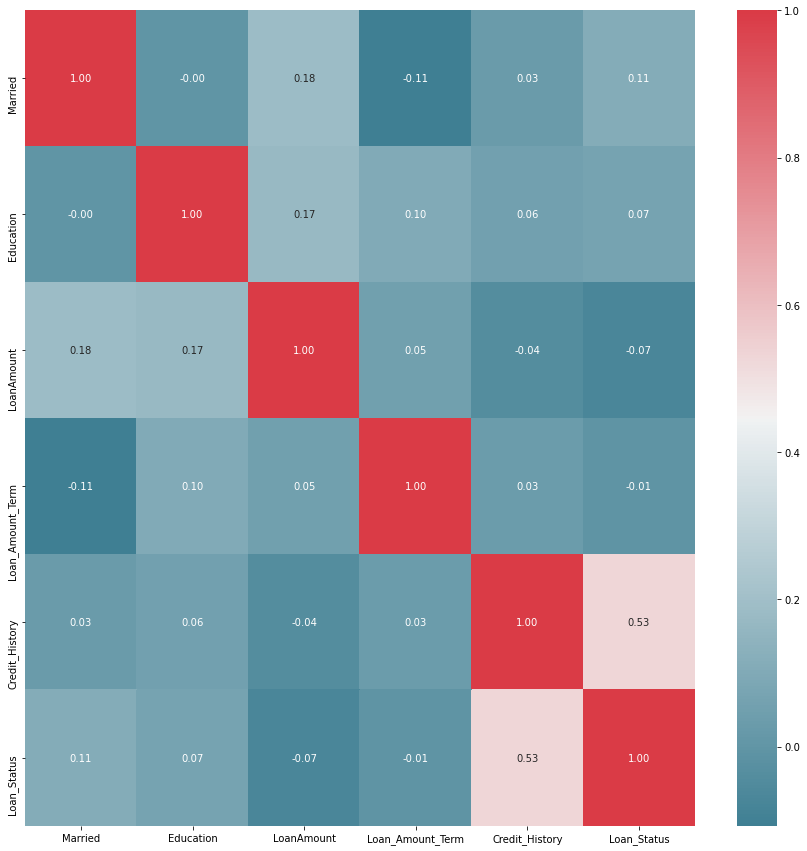

In [27]:
# Lets see the correlations
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)
corr = Test_Data.corr()
#Generate Color Map, red & blue
colormap = sbn.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sbn.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", ax=ax)

The chance-nodes of LoanAmount and LoanTerm are not dependent statistically on the chance-nodes [Married, Education and Credit History], the correlation coefficient is below 0.2 and even 0.2 is considered weakly correlated and usually ignored by investors. Same can be said for the dependence of Loan Status chance node on [LoanAmount and LoanTerm]. [2] 

## Calculating Probabilities

The marginal probabilities for Education, Credit History and Marrital status is calculated below. 

In [28]:
Base_data['Education'].value_counts()/Base_data['Education'].count()

Graduate        0.790657
Not Graduate    0.209343
Name: Education, dtype: float64

In [29]:
Base_data['Credit_History'].value_counts()/Base_data['Credit_History'].count()

1.0    0.850662
0.0    0.149338
Name: Credit_History, dtype: float64

In [30]:
Base_data['Married'].value_counts()/Base_data['Married'].count()

Yes    0.651042
No     0.348958
Name: Married, dtype: float64

The conditional probability of Loan_Status (Loan Success) is calculated below. 

In [31]:
OUTPUT = Base_data.groupby(['Credit_History','Education','Married'])['Loan_Status'].value_counts()/Base_data.groupby(['Credit_History','Education','Married'])['Loan_Status'].count()

In [32]:
OUTPUT

Credit_History  Education     Married  Loan_Status
0.0             Graduate      No       N              0.880000
                                       Y              0.120000
                              Yes      N              0.909091
                                       Y              0.090909
                Not Graduate  No       N              1.000000
                              Yes      N              0.941176
                                       Y              0.058824
1.0             Graduate      No       Y              0.730159
                                       N              0.269841
                              Yes      Y              0.846809
                                       N              0.153191
                Not Graduate  No       Y              0.727273
                                       N              0.272727
                              Yes      Y              0.777778
                                       N              0.222222
Name

-------------- All the above probabilties before First decision have been calculated in the code blocks above ----------------

## Loan Amount and Loan Term. 

### **1. LOAN AMOUNT TERM**

Lets look at the probabilties of the possible alternatives for this uncertain variable

In [33]:
Base_data['Loan_Amount_Term'].value_counts()/Base_data['Loan_Amount_Term'].count()

360.0    0.852941
180.0    0.072664
480.0    0.025952
300.0    0.022491
84.0     0.006920
240.0    0.005190
120.0    0.005190
36.0     0.003460
60.0     0.003460
12.0     0.001730
Name: Loan_Amount_Term, dtype: float64

The possible Loan Terms range from 12 months (1 year) to 480 months (40 years). The 360 months Loan Term carries the maximum relative frequency, which is visible above.  

We wish to plot the relative frequency histogram to visualize the distribution 

<AxesSubplot:ylabel='Frequency'>

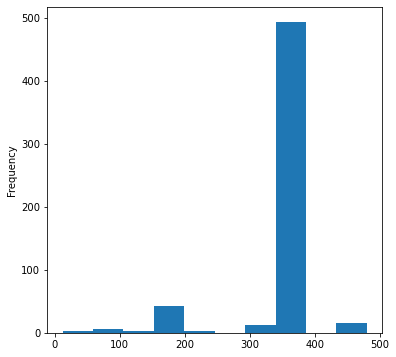

In [34]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)
Base_data['Loan_Amount_Term'].plot.hist(ax=ax)

It can be easily seen from the plot above that it is almost impossible to fit any continous theorotical distribution to this data. To prove this point we will still carry out a Kolmogorov-Simirnov: Goodness of Fit test for this variable ('Loan_Amount_Term').

The reason for this being impossible is that thre are a finite number of options availble for selection of LOAN TERM.

*Kolmogorov-Simirnov: Goodness of Fit Test Function Definition*

In [35]:
def KS_TEST(x):
    Distributions = ['gamma', 'beta', 'rayleigh', 'norm','uniform','expon','triang','weibull_max','lognorm','maxwell','erlang','chi','chi2','logistic','laplace']
    KVs_pvals=[]
    parameters=[]


    for dist_name in Distributions:
        dist = getattr(scipy.stats,dist_name)
        param = dist.fit(x)
        parameters.append(param)

        D, pv = scipy.stats.kstest(x,dist_name,args=param)
        KVs_pvals.append(pv)

    results=pd.DataFrame()

    results['Distributions'] = Distributions
    results['KS_p']= KVs_pvals
    results['Parameters']=parameters
    results.set_index('Distributions', inplace = True)

    results.sort_values(['KS_p'], ascending = False, inplace = True)
    
    return results

In [36]:
LoanTerm = Base_data['Loan_Amount_Term'].to_numpy()   #Conversion to numpy

In [37]:
warnings.filterwarnings("ignore")  #Some warnings regarding non-integer shape parameter.
KS_Result_Loan_Amount_Term = KS_TEST(Base_data['Loan_Amount_Term']) 

In [38]:
KS_Result_Loan_Amount_Term

,KS_p,Parameters
Distributions,,
logistic,1.045999e-98,"(354.8962262802414, 23.780102960496883)"
beta,1.313022e-111,"(301227525.99893755, 8.637601739592878, -63156..."
laplace,8.786887e-120,"(360.0, 24.08304498269896)"
erlang,2.247062e-124,"(419.75116006914647, -1128.9646870224979, 3.50..."
norm,1.516475e-126,"(342.1453287197232, 65.38546594144475)"
lognorm,1.546776e-127,"(0.003687800768952436, -17363.590691945374, 17..."
chi2,3.232319e-129,"(501.45389054747204, -814.7164122764495, 2.303..."
gamma,4.523054e-135,"(166.53002881714494, -621.3276297220457, 5.763..."
maxwell,9.414281e-145,"(10.240712633882364, 195.3082672910566)"


We can see that no Theorotical Distribution fits this data and satisfies the condition of a good fit. 

**p-value > or = 0.05, is not true here. It is not a law but it is a good reference for measuring goodness of fit.** 

Below these distributions will be plotted, to verify how miserably the fitting process fails for this discrete variable. 

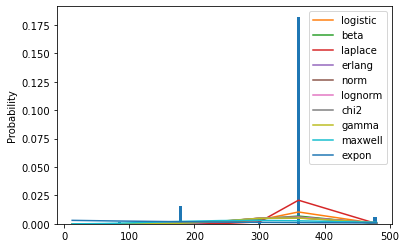

In [99]:
num_plots = 10
y=sorted(LoanTerm)
dist2plot = KS_Result_Loan_Amount_Term.index[:num_plots]
fig1,ax1 = plt.subplots()
ax1.hist(y, bins = 100, density =True)
ax1.set_ylabel('Probability')

for dist in dist2plot:
    param = KS_Result_Loan_Amount_Term['Parameters'][dist]
    dist = getattr(scipy.stats, dist)
    pdf_fitted = dist.pdf(y, *param)
    ax1.plot(y,pdf_fitted)
    
ax1.legend(dist2plot)
plt.show()

#### Using Excel now

Since no distribution from the KS-test(scipy) is fitting the loan-term data, we decided to look for more distributions and used an Excel add-in called Solver-Pro. Solver-Pro has 30 distributions(continous and discrete) and we can auto-fit distributions by using performing different tests i.e. KS, Anderson-Darling Statistics and Chi-Square statistics tests. 

As we are dealing with discrete data, we performed ***Chi-Squared statistics : Goodness of Fit Test*** on it as shown below:

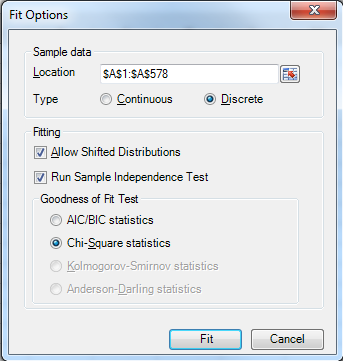

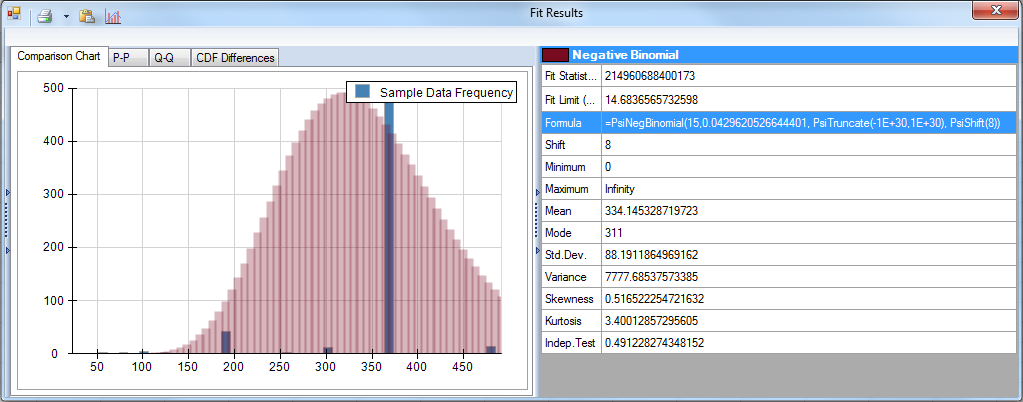

**From the Chi-Squared test, we can see that Negative binomial distribution which is also known as Pascal distribution, seems to be fitting our data.** It is not a best fit but we choose to work with this distribution. It has two parameters, the stopping parameter  **k**  and the success probability  **p** .

In our case, k and p values are:<br>
k = 15<br>
p = 0.0429620526644401<br>


In order to get Low,Base and High values, we will now discretize the disribution in DPL by using k and p values.

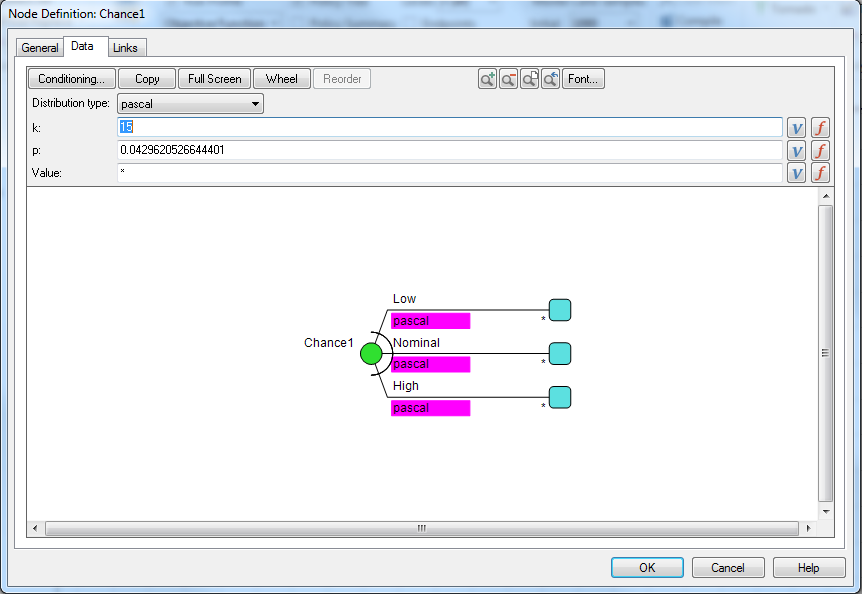

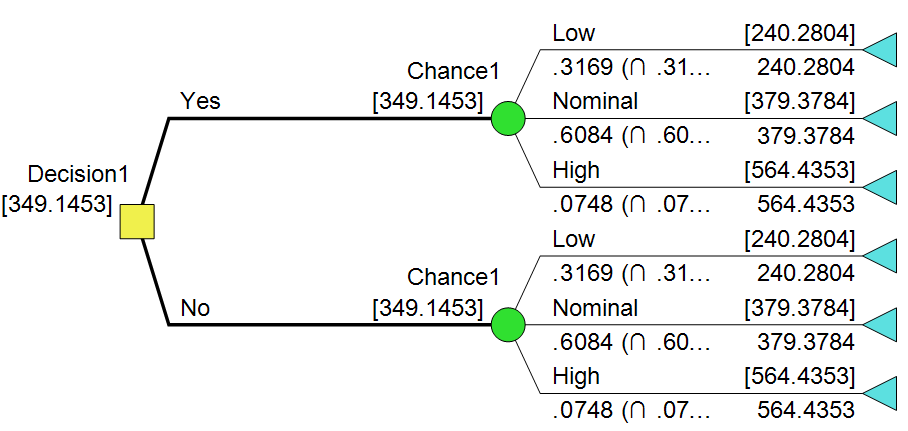

### **2. Loan Amount**

Lets calculate the marginal probabilties and store them in a pandas.series, we choose not to prnt them because this is a continuous random vaiable because there an be infinite number of possibilites for this variable although bounds for this can be defined by the company's leadership. 

In [39]:
LoanAmountSeries = Base_data['LoanAmount'].value_counts()/Base_data['LoanAmount'].count()

Lets visualize the relative frequency histogram.

<AxesSubplot:ylabel='Frequency'>

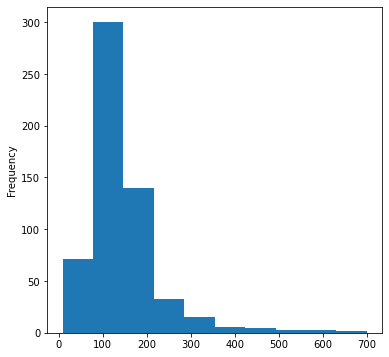

In [40]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)
Base_data['LoanAmount'].plot.hist(ax=ax)

Lets run Kolmogorov-Simirnov: Goodness of Fit Test for this variable. 

In [41]:
LoanAmount_arr = Base_data['LoanAmount'].to_numpy()   #Conversion to numpy

In [42]:
KS_Result_Loan = KS_TEST(Base_data['LoanAmount']) 
KS_Result_Loan

,KS_p,Parameters
Distributions,,
laplace,7.293659e-04,"(128.0, 52.44809688581315)"
logistic,3.443854e-04,"(134.74503097821133, 38.68515533032809)"
erlang,8.031123e-05,"(3.7278938636251384, 4.066149477242831, 38.380..."
chi2,8.031001e-05,"(7.455778155687739, 4.066215935534419, 19.1901..."
gamma,8.030501e-05,"(3.7278903491363096, 4.066178975439602, 38.380..."
beta,4.550785e-05,"(3.5782725979132497, 308037725.82143414, 4.837..."
rayleigh,1.770168e-11,"(6.789409686283477, 116.4934372902983)"
chi,4.098392e-12,"(20.803706128646965, -369.09421148557044, 114...."
maxwell,9.334258e-13,"(-23.84303264955375, 110.57206863308701)"


**Laplace Distribution is the best possible choice here** although it p-value is smaller than 0.05 for this fit. 

Lets plot the ECDF for this variable i.e. LoanAmount

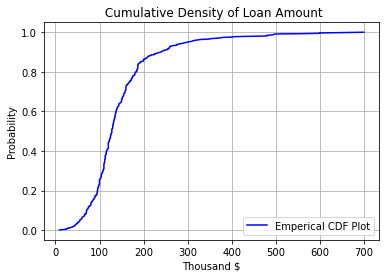

In [112]:
ecdf = ECDF(LoanAmount_arr)

plt.plot(ecdf.x, ecdf.y,label = 'Emperical CDF Plot',color='blue')

plt.ylabel('Probability')
plt.xlabel('Thousand $')
plt.title(' Cumulative Density of Loan Amount')
plt.grid(True)
plt.legend()
plt.show()

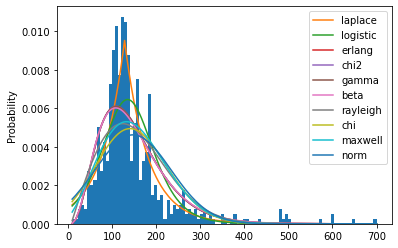

In [113]:
num_plots = 10
y=sorted(LoanAmount_arr)
dist2plot = KS_Result_Loan.index[:num_plots]
fig1,ax1 = plt.subplots()
ax1.hist(y, bins = 100, density =True)
ax1.set_ylabel('Probability')

for dist in dist2plot:
    param = KS_Result_Loan['Parameters'][dist]
    dist = getattr(scipy.stats, dist)
    pdf_fitted = dist.pdf(y, *param)
    ax1.plot(y,pdf_fitted)
    
ax1.legend(dist2plot)
plt.show()

We can see the top 10 distributions above in the plot and **laplace seems to be the best fit here as well.** 

The decision analysts choose to  model this variable with a 3 branch Gamma Discrete Approximation in DPL, although **Laplace seems to be the best fit by the KS-Test but upon discretization in DPL the P(LOW) -> Negative which is untrue about the Loan Amount which can never be negative.** The represetation of this uncertain variable in terms of gamma distribution can be seen below.

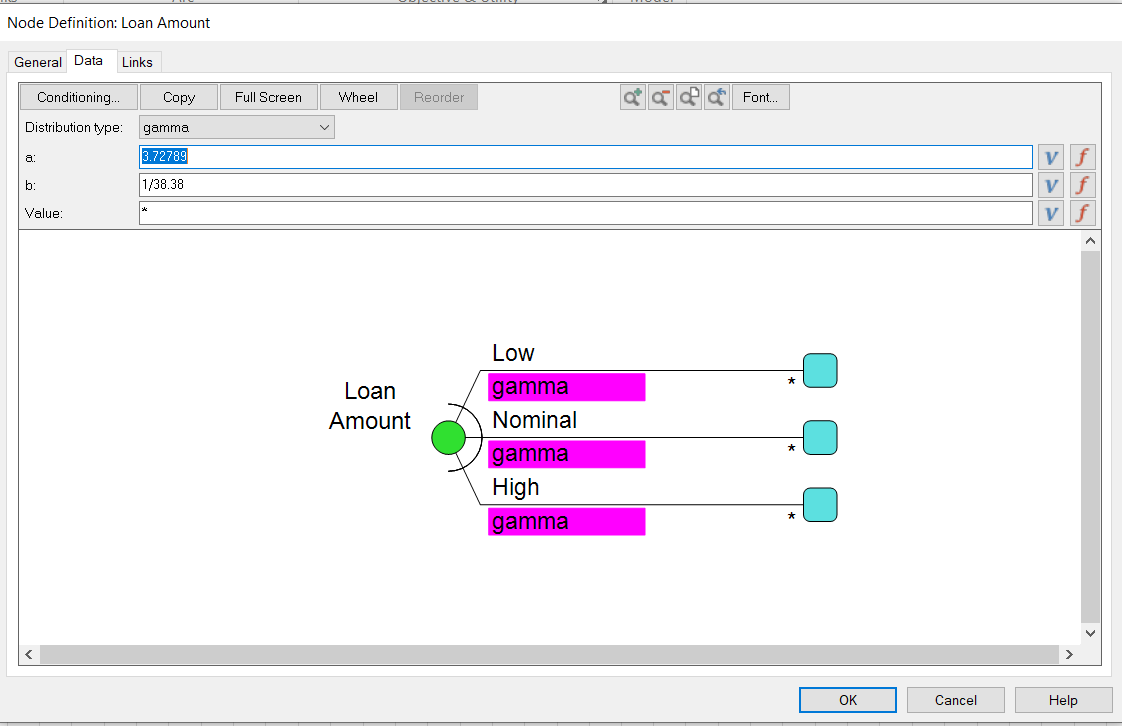

### Interest Rate

The interest Rates offered by banks in US are range from 3.00% to 4.5%. The Company has decided to offer rates in-between this realistic range as well. The Decision Analysists dont have the data for the previous interest rates, so this variable is assumed to be normally distributed. 

In [116]:
InterestRatearr = np.arange(0.03,0.045,0.0001)

In [117]:
np.mean(InterestRatearr)

0.03744999999999995

In [118]:
np.std(InterestRatearr)

0.004330030792808111

The representation of this chance node can be seen below in DPL as well. 

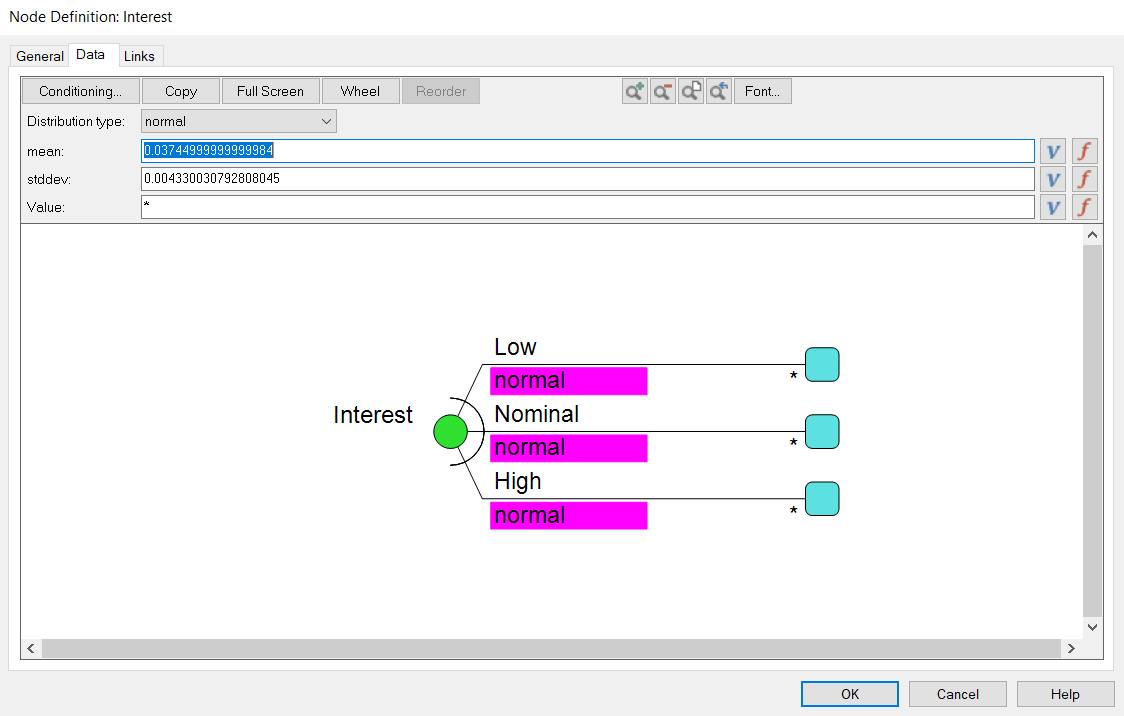

## References:

1. *Risk-Solver, Fit distributions.* 

https://www.solver.com/risk-solver-fit-distributions

2. *Pascal Distribution.*

https://stattrek.com/probability-distributions/negative-binomial.aspx#:~:text=A%20negative%20binomial%20random%20variable,known%20as%20the%20Pascal%20distribution.

3. *Interest rates from US BANKS.*

https://www.usbank.com/home-loans/mortgage/mortgage-rates.html

4. *Correlation coefficient and it's value.*  

https://www.investopedia.com/terms/c/correlationcoefficient.asp#:~:text=The%20correlation%20coefficient%20is%20a,error%20in%20the%20correlation%20measurem
